<a href="https://colab.research.google.com/github/ekomation/research/blob/main/script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the decision tree classifier to the training data
dt.fit(X_train, y_train)

# Get the feature importances from the decision tree
importances = dt.feature_importances_

# Print the feature importances
for feature, importance in zip(iris.feature_names, importances):
    print(f"{feature}: {importance:.3f}")


sepal length (cm): 0.000
sepal width (cm): 0.018
petal length (cm): 0.900
petal width (cm): 0.082


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df.iloc[:, :-1], label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score


classifiers = ['Logistic', 'Support vector Machine', 'KNeighbors']



In [ ]:
models = [LogisticRegression(max_iter = 1000),
          svm.SVC(kernel='rbf'),
          KNeighborsClassifier()]

In [ ]:
def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
   # X = df.iloc[:, : -1]
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    #joblib.dump(model, 'diabetes_prediction_model.joblib')
    return Score


In [ ]:
def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))

In [ ]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)     
        chromosome[:int(0.3*n_feat)]=False             
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population



In [ ]:
def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)         
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds,:][::-1]) 



In [ ]:

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


In [ ]:

def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


In [ ]:

def mutation(pop_after_cross,mutation_rate,n_feat):   
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = [] 
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]  
        pop_next_gen.append(chromo)
    return pop_next_gen

In [ ]:
def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_data.csv to diabetes_data.csv


In [ ]:
data_db = pd.read_csv("diabetes_data.csv").sample(frac = 1).reset_index(drop = True).drop([])
label_db = data_db["CLASS"]


print("Diabetes disease dataset:\n",data_db.shape[0],"Records\n",data_db.shape[1],"Features")


Diabetes disease dataset:
 1000 Records
 14 Features


In [ ]:
#data cleaning
data_db['CLASS'] = [2 if CLASS.strip() == 'Y' else 0 if CLASS.strip() == 'N' else 1 for CLASS in data_db['CLASS']]
data_db['Gender'] = [0 if Gender.strip() in ['f', 'F'] else 1 if Gender.strip() == 'M' else None for Gender in data_db['Gender']]

In [ ]:
data_db.head(8)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,196,454316,1,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,2
1,109,46638,1,42,4.6,91,4.5,5.6,2.1,0.9,3.8,0.9,22.0,2
2,227,24047,0,63,8.7,93,9.0,5.9,2.2,1.2,3.7,1.0,29.0,2
3,62,34545,1,59,4.6,53,13.3,5.4,3.0,1.2,3.0,1.3,29.0,2
4,465,34484,0,56,2.3,22,10.2,5.8,2.0,1.1,1.8,0.9,27.0,2
5,591,34481,0,61,2.5,45,11.6,9.7,13.8,1.0,3.1,6.3,33.0,2
6,180,454316,0,54,6.3,106,5.6,4.3,2.0,1.3,2.2,0.9,20.0,0
7,184,45431,0,55,11.7,136,9.6,5.2,1.5,1.1,3.5,0.7,29.0,2


In [ ]:
# Split dataset into input and output variables
X = data_db.iloc[:, 0:13]
Y = data_db.iloc[:, 13]



In [ ]:
#performing feature selection to pick the mose prevalent variables
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

# Train a decision tree classifier on the training set
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Print the feature importances
print("Feature importances:\n{}".format(dtc.feature_importances_))

# Select the most important features
important_features = [i for i in dtc.feature_importances_.tolist() if i > 0.0]
#X_train_reduced = X_train[:, important_features]
#X_test_reduced = X_test[:, important_features]

Feature importances:
[0.         0.0092848  0.         0.13023442 0.         0.00904364
 0.61292511 0.07176393 0.0322422  0.00777322 0.0173794  0.
 0.10935327]


In [ ]:
reduced_data = data_db[['AGE', 'HbA1c', 'Chol', 'TG', 'VLDL', 'BMI', 'CLASS']]

In [ ]:
#predicting the result using K-means classifier
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Preparing the dataset
X = reduced_data.drop("CLASS", axis = 1)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[ 0.16737086,  0.08640459,  0.10543496,  0.10738497, -0.31533956,
        -0.51977192],
       [-1.31076854, -1.49291529,  0.56658801, -0.17823235, -0.26072112,
        -1.52785548],
       [ 1.07699511,  0.28381958,  0.79716453, -0.10682802, -0.2334119 ,
        -0.11653849],
       ...,
       [-1.5381746 , -0.30842538, -0.35571809, -0.67806268,  2.22441785,
        -0.25767019],
       [ 0.05366783,  2.13952043,  1.4888941 , -0.46384968, -0.28803034,
         0.08507822],
       [-0.40114429, -1.49291529, -1.1243065 , -1.177893  , -0.42457644,
        -1.52785548]])

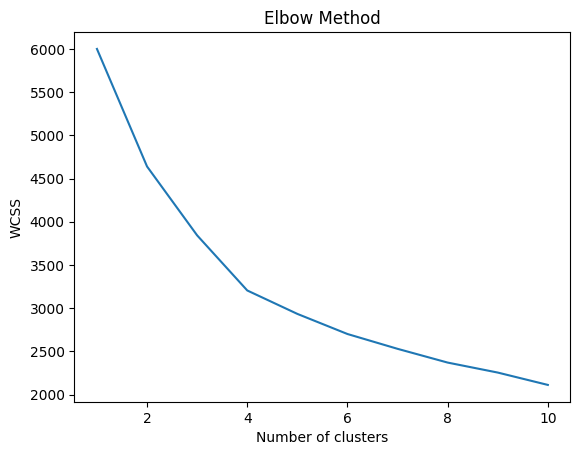

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
labels = kmeans.predict(X)
reduced_means = reduced_data.copy()

In [ ]:
reduced_means['Cluster'] = labels

In [ ]:
reduced_means

,AGE,HbA1c,Chol,TG,VLDL,BMI,CLASS,Cluster
0,55,8.5,5.0,2.5,0.7,27.0,2,0
1,42,4.5,5.6,2.1,0.9,22.0,2,1
2,63,9.0,5.9,2.2,1.0,29.0,2,0
3,59,13.3,5.4,3.0,1.3,29.0,2,0
4,56,10.2,5.8,2.0,0.9,27.0,2,0
...,...,...,...,...,...,...,...,...
995,52,13.2,3.9,1.3,0.6,35.0,2,0
996,69,7.7,4.9,1.9,0.7,37.0,2,0
997,40,7.5,4.4,1.4,10.0,28.3,2,2
998,54,13.7,6.8,1.7,0.8,30.0,2,0


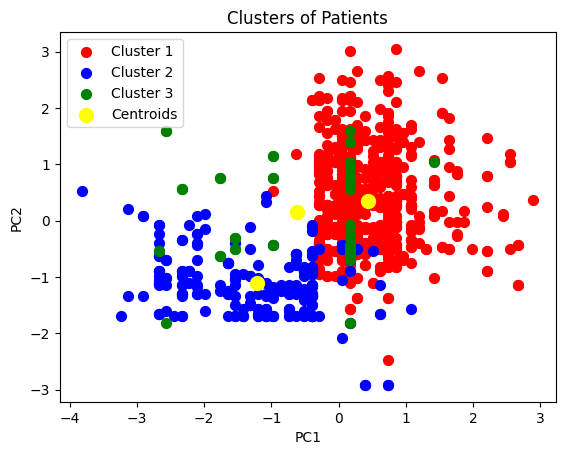

In [ ]:
#visualizing gthe result
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Patients')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
#Feature selection : using Feature Importance Method
#Here logistc regression is employed.
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

fx = data_db.drop('CLASS', axis = 1)
fy = data_db['CLASS']


# Fit a random forest classifier model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(fx, fy)


# Select features based on feature importances
selector = SelectFromModel(clf, threshold='median')
selector.fit(fx, fy)


# Print the selected feature indices
selected_features = selector.get_support(indices=True)
print(selected_features)


[ 1  3  6  7  8 11 12]


In [ ]:
unscaled_acc = acc_score(data_db,label_db)

In [ ]:
unscaled_acc

,Classifier,Accuracy
0,KNeighbors,0.852
1,Logistic,0.848
2,Support vector Machine,0.848


In [ ]:
#scaled_acc = acc_score9dat

In [ ]:
from sklearn.cluster import KMeans

# create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=2, random_state = 1)

# fit the data to the model
kmeans = kmeans.fit(data_db)

# predict the cluster labels for each data point
labels = kmeans.predict(data_db)

# get the centroids of each cluster
centroids = kmeans.cluster_centers_

# get the sum of squared distances for each point to its nearest centroid
wcss = kmeans.inertia_

In [ ]:
data_with_clusters = pd.concat([data_db, pd.Series(kmeans.labels_, name="Cluster")], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
data_db.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [ ]:
data_with_scale = data_db.copy()

In [ ]:
columns_to_scale = ['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI']

In [ ]:
data_with_scale[columns_to_scale] = scaler.fit_transform(data_db[columns_to_scale])

In [ ]:
data_with_scale.tail(5)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
995,1.475378,-0.069871,-1.139671,0.735886,-0.451561,-0.582823,0.007439,-0.432577,0.464407,0.295796,-0.098507,0.039680,0.488312,2
996,1.708442,-0.069861,-1.139671,0.053668,1.218686,0.851592,-0.071527,-0.663153,-0.392445,0.750284,-0.726566,-0.096866,0.286695,2
997,0.921851,-0.079897,0.877446,0.622183,0.025653,-0.215879,1.033997,0.028576,-0.178232,-0.158692,-0.098507,-0.260721,-0.318155,2
998,-1.292256,-0.078130,0.877446,0.167371,0.332433,0.184422,0.086405,0.566588,-0.178232,-0.461684,1.067890,-0.397267,-0.721389,2
999,0.871909,-0.080030,-1.139671,-0.287441,-0.315214,0.050988,1.152446,-0.355718,-0.178232,-0.158692,-0.098507,-0.260721,-0.721389,2


In [ ]:
unscaled_acc = acc_score(data_db, label_db)

In [ ]:
unscaled_acc

,Classifier,Accuracy
0,KNeighbors,0.852
1,Logistic,0.848
2,Support vector Machine,0.848


In [ ]:
scaled_acc = acc_score(data_with_scale, label_db)

In [ ]:
scaled_acc

,Classifier,Accuracy
0,Support vector Machine,0.928
1,Logistic,0.924
2,KNeighbors,0.896


In [ ]:
X_train, X_test, Y_train, Y_test = split(data_with_scale, label_db)

In [ ]:
X_train

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
82,-0.717920,-0.066640,0.877446,-2.675205,-0.042521,-0.265917,-0.229459,0.489729,-0.178232,-0.310188,0.888444,-0.260721,-1.124622
991,-0.826128,-0.066639,-1.139671,-2.106690,1.355033,0.751517,-0.426874,0.566588,-0.678063,0.295796,0.888444,-0.342649,-1.931089
789,-0.389133,-0.069838,0.877446,0.735886,-0.383388,0.151064,2.297452,-0.586295,-0.749467,0.901780,0.888444,0.039680,0.689928
894,-1.225666,-0.077118,0.877446,-0.287441,11.512863,-0.182521,-0.584806,0.797165,0.178789,0.295796,0.708998,-0.178793,0.689928
398,-0.638845,0.054383,-1.139671,0.735886,-0.042521,0.017630,-0.071527,0.259153,0.678620,0.295796,-1.803240,0.312772,-0.519772
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-1.034221,-0.069897,0.877446,0.053668,-0.587908,-0.516106,0.402269,0.336011,0.678620,-0.310188,-1.085457,-0.151484,-0.318155
270,1.641852,-0.069940,0.877446,-3.130017,-0.212954,-0.115804,-1.334983,-0.893730,-0.678063,-0.158692,-0.457398,-0.342649,-1.326239
860,-0.859423,-0.066641,-1.139671,-2.675205,-0.519734,-0.132483,-1.137568,1.258318,-0.392445,0.447292,1.426781,-0.288030,-1.124622
435,0.047861,-0.069500,-1.139671,0.167371,-0.758341,-0.466068,0.481235,0.797165,-0.463850,-0.007196,0.888444,-0.288030,-0.721389


In [ ]:
testmodel = LogisticRegression(max_iter = 1000)
testmodel.fit(X_train, Y_train)
y_pred = testmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cm = confusion_matrix(Y_test, y_pred, labels = ['Y', 'N', 'P'])

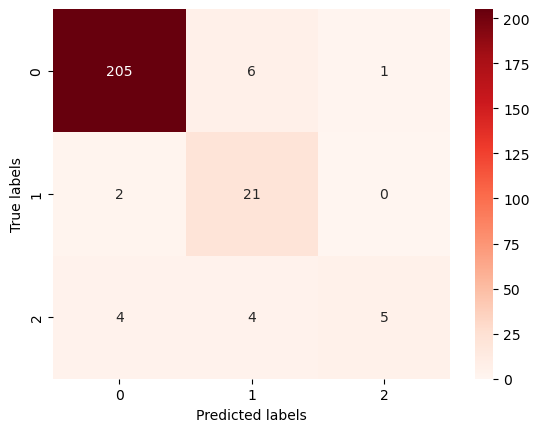

In [ ]:
# Create a heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
print(cm)

[[205   6   1]
 [  2  21   0]
 [  4   4   5]]


In [ ]:
logmodel = LogisticRegression(max_iter = 1000)

In [ ]:
X_train, X_test, Y_train, Y_test = split(data_with_scale, label_db)

In [ ]:
chromo_df_bc,score_bc=generations(data_with_scale,label_db,size=80,n_feat= X_train.shape[1], n_parents=64,mutation_rate=0.20,n_gen=5, X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

Best score in generation 1 : [0.928]
Best score in generation 2 : [0.928]
Best score in generation 3 : [0.928]
Best score in generation 4 : [0.924]
Best score in generation 5 : [0.924]
